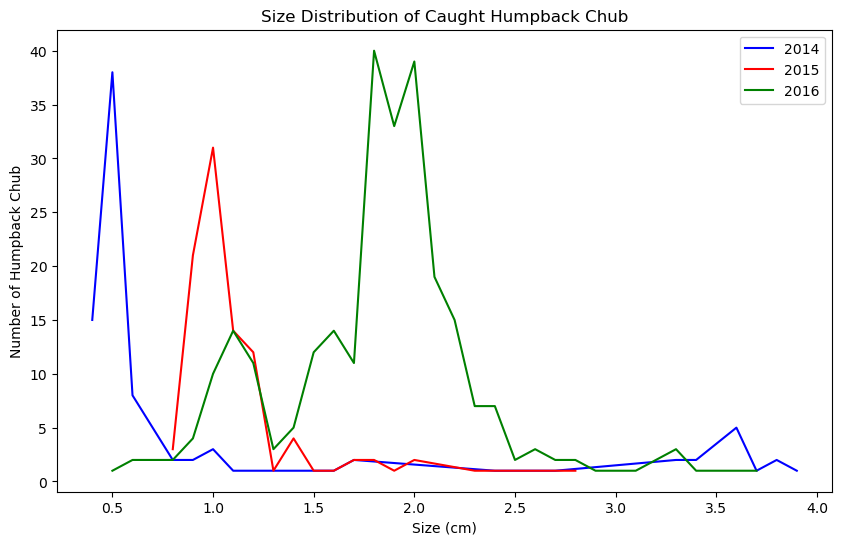

In [1]:
# Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

# Grabbing variables to plot against each other
total_length = '../Humpbackchub_Gi/HBC_Length_Freq_Fig4.csv'
total_length_df = pd.read_csv(total_length, usecols = ['Year', 'Total_Length'], skiprows=[1])

# Initialize empty lists for the chub lengths for each year
lengths_2014 = list()
lengths_2015 = list()
lengths_2016 = list()

# runs through each row in the data array, appends the length to the list that corresponds to the year
n = 0
while n < 456:
    year = total_length_df.iloc[n, 0]
    length = total_length_df.iloc[n, 1]
    if year == 2014:
        lengths_2014.append(length)
    if year == 2015:
        lengths_2015.append(length)
    if year == 2016:
        lengths_2016.append(length)
    n += 1

# Rounds the length values to the nearest 10th of a mm
# Converts mm to cm
def smooth(length):
    smooth = round(length / 10) * 10
    cm = smooth/100
    if cm < 0:
        cm = 0
    return cm

# Applies smoothing to the list of lengths
lengths_2014 = [smooth(x) for x in lengths_2014]
lengths_2015 = [smooth(x) for x in lengths_2015]
lengths_2016 = [smooth(x) for x in lengths_2016]

#Creates a data array with the length and number of chub at that length
lengths14, chubs14 = np.unique(lengths_2014, return_counts=True)
array_2014 = np.column_stack((lengths14, chubs14))

lengths15, chubs15 = np.unique(lengths_2015, return_counts=True)
array_2015 = np.column_stack((lengths15, chubs15))

lengths16, chubs16 = np.unique(lengths_2016, return_counts=True)
array_2016 = np.column_stack((lengths16, chubs16))

# Separates each array into two variables- length and count
x14 = array_2014[:, 0]
y14 = array_2014[:, 1]

x15 = array_2015[:, 0]
y15 = array_2015[:, 1]

x16 = array_2016[:, 0]
y16 = array_2016[:, 1]

# plot the length on the x axis and count on y axis
plt.figure(figsize=(10, 6))
plt.plot(x14, y14, label='2014', color='blue')
plt.plot(x15, y15, label='2015', color='red')
plt.plot(x16, y16, label='2016', color='green')

# Add labels and title
plt.xlabel('Size (cm)')
plt.ylabel('Number of Humpback Chub')
plt.title('Size Distribution of Caught Humpback Chub')
plt.legend()
plt.show()